In [35]:
import h5py
import hdf5plugin
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from pathlib import Path

### Open the HDF file

In this step we assume that the FLOGA dataset has been downloaded into the folder `data/`.

In [23]:
floga_path = Path('data')
floga_path = Path('/cellar/datasets/with_marked_overlapping_burnt_areas/only_fb/for_distribution/')
hdf = h5py.File(floga_path / 'FLOGA_dataset_2017_sen2_60_mod_500.h5', 'r')

The outline of the HDF file is shown below:

![HDF contents](assets/hdf_contents.png)

where `<year>` is the year of the examined data, `<event_id>` is a unique identifier of each event in a single year, and `<gsd>` is the spatial resolution of the Sentinel-2 imagery contained in this HDF file.

<font color='red'>attrs</font> include the following metadata:
 - `post_image_date`: The date of the post-image acquisition
 - `post_modis_file`: The identifier of the MODIS image
 - `post_sen2_file`: The identifier of the Sentinel-2 image
 - `pre_image_date`: The date of the pre-fire image acquisition
 - `pre_modis_file`: The identifier of the MODIS image
 - `pre_sen2_file`: The identifier of the Sentinel-2 image

In [16]:
hdf.keys()

<KeysViewHDF5 ['2017']>

In [17]:
hdf['2017'].keys()

<KeysViewHDF5 ['0', '10', '17', '19', '2', '20', '23', '26', '29', '3', '32', '35', '38', '4', '40', '43', '45', '46', '47', '49', '5', '51', '53', '57', '58', '60', '61', '62', '64', '67', '69', '70', '71', '74', '76', '77', '78', '79', '80', '82', '83', '84', '85', '86']>

We can see that this particular HDF file contains data for the year 2017 (as can also be derived from the HDF filename), and in particular 44 fire events with IDs: 0, 10, 17, 19, etc.

Let's examine the first event.

In [18]:
hdf['2017']['0'].keys()

<KeysViewHDF5 ['clc_100_mask', 'label', 'mod_500_cloud_post', 'mod_500_cloud_pre', 'mod_500_post', 'mod_500_pre', 'sea_mask', 'sen2_60_cloud_post', 'sen2_60_cloud_pre', 'sen2_60_post', 'sen2_60_pre']>

This particular event with ID 0 contains all necessary data, i.e. CLC mask, sea mask, cloud masks, MODIS imagery, Sentinel-2 imagery and label.
We can also see that the spatial resolution of the Sentinel-2 data is 60m (as can also be derived from the HDF filename).

Let's open the pre-fire Sentinel-2 image.

In [24]:
hdf['2017']['0']['sen2_60_pre'][:]

array([[[418, 422, 434, ...,   0,   0,   0],
        [423, 432, 441, ...,   0,   0,   0],
        [427, 443, 443, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[224, 236, 247, ...,   0,   0,   0],
        [226, 234, 251, ...,   0,   0,   0],
        [242, 250, 255, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[ 30,  45,  57, ...,   0,   0,   0],
        [ 28,  43,  57, ...,   0,   0,   0],
        [ 48,  56,  63, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       ...,

       [[ 61,  69,  77, ...,   0,   0,   0],
        [ 58,  70,  80, ...,   0,   0,   0],
        [ 72,  79,  80, ...,   0,   0,   0

We see that it is a numpy array of dtype `int32`.

Now let's take a look at the attributes.

In [11]:
hdf['2017']['0'].attrs.keys()

<KeysViewHDF5 ['post_image_date', 'post_modis_file', 'post_sen2_file', 'pre_image_date', 'pre_modis_file', 'pre_sen2_file']>

In [25]:
for k, v in hdf['2017']['0'].attrs.items():
    print(f'{k}: {v}')

post_image_date: 2017-09-16
post_modis_file: MOD09GA.A2017259.h19v05.006.2017261041018
post_sen2_file: S2A_MSIL2A_20170916T092031_N0205_R093_T34SEG_20170916T092843
pre_image_date: 2017-06-28
pre_modis_file: MOD09GA.A2017179.h19v05.006.2017181023456
pre_sen2_file: S2A_MSIL2A_20170628T092031_N0205_R093_T34SEG_20170628T092815


### Visualize images and labels

Let's visualize a sample from this HDF file.

In [39]:
# Define custom colormap for the labels
cmap = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', [(0, 0, 0, 10), (0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0), (0.8647058823529412, 0.30980392156862746, 0.45882352941176474, 1.0)], 3)
cmap_sea = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap clouds', [(0, 0, 0, 1.0), (1.0, 1.0, 1.0, 1.0)], 2)
cmap_clc = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap clc', 
    [
        (0, 0, 0, 1.0),  # NODATA
        (0.902, 0.0, 0.302, 1.0),  # Continuous urban fabric
        (1.0, 0.0, 0.0, 1.0),  # Discontinuous urban fabric
        (0.8, 0.302, 0.949, 1.0),  # Industrial or commercial units
        (0.8, 0.0, 0.0, 1.0),  # Road and rail networks and associated land
        (0.902, 0.8, 0.8, 1.0),  # Port areas
        (0.901, 0.8, 0.902, 1.0),  # Airports
        (0.651, 0.0, 0.8, 1.0),  # Mineral extraction sites
        (0.651, 0.302, 1.0, 1.0),  # Dump sites
        (1.0, 0.302, 1.0, 1.0),  # Construction sites
        (1.0, 0.651, 1.0, 1.0),  # Green urban areas
        (1.0, 0.902, 1.0, 1.0),  # Sport and leisure facilities
        (1.0, 1.0, 0.659, 1.0),  # Non-irrigated arable land
        (1.0, 1.0, 0.0, 1.0),  # Permanently irrigated land
        (0.902, 0.902, 0.0, 1.0),  # Rice fields
        (0.902, 0.502, 0.0, 1.0),  # Vineyards
        (0.949, 0.651, 0.302, 1.0),  # Fruit trees and berry plantations
        (0.902, 0.651, 0.0, 1.0),  # Olive groves
        (0.902, 0.902, 0.302, 1.0),  # Pastures
        (1.0, 0.902, 0.651, 1.0),  # Annual crops associated with permanent crops
        (1.0, 0.902, 0.302, 1.0),  # Complex cultivation patterns
        (0.902, 0.8, 0.302, 1.0),  # Land principally occupied by agriculture with significant areas of natural vegetation
        (0.949, 0.8, 0.651, 1.0),  # Agro-forestry areas
        (0.502, 1.0, 0.0, 1.0),  # Broad-leaved forest
        (0.0, 0.651, 0.0, 1.0),  # Coniferous forest
        (0.302, 1.0, 0.0, 1.0),  # Mixed forest
        (0.8, 0.949, 0.302, 1.0),  # Natural grasslands
        (0.651, 1.0, 0.502, 1.0),  # Moors and heathland
        (0.651, 0.902, 0.302, 1.0),  # Sclerophyllous vegetation
        (0.651, 0.949, 0.0, 1.0),  # Transitional woodland-shrub
        (0.902, 0.902, 0.902, 1.0),  # Beaches dunes sands
        (0.8, 0.8, 0.8, 1.0),  # Bare rocks
        (0.8, 1.0, 0.8, 1.0),  # Sparsely vegetated areas
        (0.0, 0.0, 0.0, 1.0),  # Burnt areas
        (0.651, 0.902, 0.8, 1.0),  # Glaciers and perpetual snow
        (0.651, 0.651, 1.0, 1.0),  # Inland marshes
        (0.302, 0.302, 1.0, 1.0),  # Peat bogs
        (0.8, 0.8, 1.0, 1.0),  # Salt marshes
        (0.902, 0.902, 1.0, 1.0),  # Salines
        (0.651, 0.651, 0.902, 1.0),  # Intertidal flats
        (0.0, 0.8, 0.949, 1.0),  # Water courses
        (0.0, 1.0, 0.651, 1.0),  # Coastal lagoons
        (0.651, 1.0, 0.902, 1.0),  # Estuaries
        (0.902, 0.949, 1.0, 1.0),  # Sea and ocean
    ],
    44
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


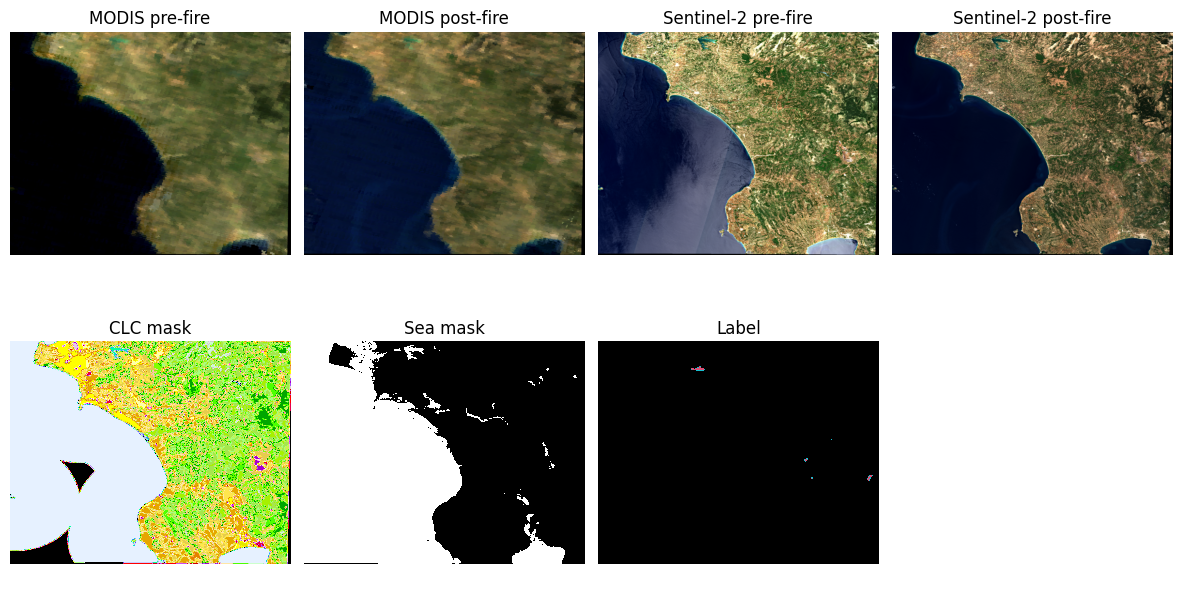

In [47]:
def scale_image(img):
    img = img.astype(np.float32)
    return img / img.max()

event_id = '0'
bands = 'nrg'  # 'nrg' for NIR-R-G composites, 'rgb' for R-G-B composites

if bands == 'nrg':
    # Get band indices for R, G, B
    sen2_plot_bands = [3, 2, 1]
    mod_plot_bands = [0, 3, 2]
else:
    # Get band indices for NIR, R, G
    sen2_plot_bands = [10, 3, 2]
    mod_plot_bands = [1, 0, 3]

fig, ax = plt.subplots(2, 4, figsize=(15, 8))

# MODIS pre-fire image
img = hdf['2017'][event_id]['mod_500_pre'][:][mod_plot_bands, ...]
img = scale_image(img)
img = np.moveaxis(img, 0, -1)
ax[0, 0].imshow(img)
ax[0, 0].set_title('MODIS pre-fire')

# MODIS post-fire image
img = hdf['2017'][event_id]['mod_500_post'][:][mod_plot_bands, ...]
img = scale_image(img)
img = np.moveaxis(img, 0, -1)
ax[0, 1].imshow(img)
ax[0, 1].set_title('MODIS post-fire')

# Sentinel-2 pre-fire image
img = hdf['2017'][event_id]['sen2_60_pre'][:][sen2_plot_bands, ...]
img = scale_image(img)
img = np.moveaxis(img, 0, -1)
ax[0, 2].imshow(img * 7)
ax[0, 2].set_title('Sentinel-2 pre-fire')

# Sentinel-2 post-fire image
img = hdf['2017'][event_id]['sen2_60_post'][:][sen2_plot_bands, ...]
img = scale_image(img)
img = np.moveaxis(img, 0, -1)
ax[0, 3].imshow(img * 7)
ax[0, 3].set_title('Sentinel-2 post-fire')

# CLC mask
img = hdf['2017'][event_id]['clc_100_mask'][:]
img[(img == 48) | (img == 128)] = 0  # NODATA
img = np.moveaxis(img, 0, -1)
ax[1, 0].imshow(img, vmin=0, vmax=43, cmap=cmap_clc)
ax[1, 0].set_title('CLC mask')

# Sea mask
img = hdf['2017'][event_id]['sea_mask'][:]
ax[1, 1].imshow(img.squeeze(), vmin=0, vmax=1, cmap=cmap_sea)
ax[1, 1].set_title('Sea mask')

# Label
img = hdf['2017'][event_id]['label'][:]
ax[1, 2].imshow(img.squeeze(), vmin=0, vmax=2, cmap=cmap)
ax[1, 2].set_title('Label')

# Remove axes and ticks
for i in range(2):
    for j in range(4):
        # Remove all axis labels
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])

        ax[i, j].spines['top'].set_visible(False)
        ax[i, j].spines['right'].set_visible(False)
        ax[i, j].spines['bottom'].set_visible(False)
        ax[i, j].spines['left'].set_visible(False)

plt.subplots_adjust(wspace=0.05, hspace=0.01)